In [1]:
%pip install pandas
%pip install scikit-learn
%pip install tensorflow
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\MSii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\MSii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\MSii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\MSii\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from keras.wrappers.scikitlearn import KerasRegressor
from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pickle
import joblib

In [11]:
data = pd.read_csv('preprocessing/organized_data_encoded.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.columns
# data.drop(['locations_Jami Ul-Alfar Mosque'], axis = 1, inplace = True)
df = pd.DataFrame(data)

# Separate features (X) and target variables (y)
X = df.drop(['stayTime', 'locations'], axis=1)
y = df[['stayTime']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
X_train.shape

(2906, 22)

In [24]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a neural network model
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='linear'))

optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
hitsory = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100


C:\Users\MSii\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 10065.5078 - val_accuracy: 0.0000e+00 - val_loss: 2189.6816
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1966.6165 - val_accuracy: 0.0000e+00 - val_loss: 2068.6790
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 1945.9700 - val_accuracy: 0.0000e+00 - val_loss: 2035.6986
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 1859.8032 - val_accuracy: 0.0000e+00 - val_loss: 2053.9045
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 1846.0826 - val_accuracy: 0.0000e+00 - val_loss: 2020.7319
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 1859.6754 - val_accuracy: 0.0000e+00 - val_loss: 2024.7675
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 1815.2654 - val_accuracy: 0.0000e+00 - val_loss: 2024.9852
Epoch 8/100
73/73 ━━━━━━

In [25]:
# Predict on the test set
y_preds = model.predict(X_test)
# Convert probabilities to binary predictions (0 or 1)
y_preds = np.round(y_preds)
print(y_preds)
# y_preds = (y_pred > 0.5).astype(int)
print(y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[104.]
 [118.]
 [118.]
 [104.]
 [125.]
 [ 80.]
 [ 95.]
 [ 91.]
 [100.]
 [111.]
 [125.]
 [101.]
 [ 93.]
 [100.]
 [ 91.]
 [ 88.]
 [101.]
 [101.]
 [124.]
 [118.]
 [118.]
 [107.]
 [125.]
 [ 90.]
 [106.]
 [ 97.]
 [107.]
 [104.]
 [106.]
 [125.]
 [102.]
 [ 80.]
 [104.]
 [125.]
 [ 80.]
 [ 99.]
 [111.]
 [103.]
 [111.]
 [118.]
 [101.]
 [102.]
 [ 97.]
 [124.]
 [ 87.]
 [119.]
 [ 94.]
 [ 90.]
 [101.]
 [ 91.]
 [111.]
 [107.]
 [110.]
 [119.]
 [ 93.]
 [108.]
 [101.]
 [107.]
 [124.]
 [119.]
 [ 87.]
 [104.]
 [107.]
 [ 97.]
 [ 91.]
 [108.]
 [101.]
 [ 95.]
 [124.]
 [ 97.]
 [ 80.]
 [ 95.]
 [111.]
 [106.]
 [108.]
 [ 94.]
 [ 93.]
 [ 94.]
 [ 95.]
 [125.]
 [104.]
 [107.]
 [102.]
 [118.]
 [124.]
 [ 94.]
 [ 80.]
 [118.]
 [103.]
 [101.]
 [ 93.]
 [ 92.]
 [106.]
 [ 87.]
 [102.]
 [112.]
 [ 98.]
 [106.]
 [101.]
 [103.]
 [ 93.]
 [124.]
 [103.]
 [ 90.]
 [102.]
 [ 88.]
 [ 90.]
 [ 90.]
 [ 95.]
 [118.]
 [119.]
 [ 93.]
 [102.]
 [ 87.]
 [104.]
 [106.]
 [ 89.]
 [110.]
 [119.]
 [ 90.]
 

In [40]:
# Evaluate the model
mse_values = {column: mean_squared_error(y_test[column], y_preds[:, i]) for i, column in enumerate(y.columns)}
print(f'Mean Squared Errors: {mse_values}')

mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 score: {r2}')

Mean Squared Errors: {'stayTime': 1720.2434662998623}
Mean Squared Error: 1720.2434662998623
Mean Absolute Error: 34.557083906464925
R2 score: 0.03703598209934744


In [74]:
joblib.dump(model, 'model.joblib')

PicklingError: Can't pickle <function Layer._initializer_tracker.<locals>.<lambda> at 0x0000020DDC14D300>: it's not found as keras.src.layers.layer.Layer._initializer_tracker.<locals>.<lambda>

In [72]:
pickle.dump(model, open('pkmodel.pkl', 'wb'))

AttributeError: Can't pickle local object 'Layer._initializer_tracker.<locals>.<lambda>'

In [31]:
model.save("model.h5")


In [53]:
new_data.head(10)

,timeOfDay_Evening,locationType_Shopping Center,placeID_ChIJseUqHGtZ4joRgteF9GKSLoc
0,True,True,True


In [54]:
model = load_model("model.h5")

new_data = pd.read_csv('preprocessing/new_data_encoded.csv')

# Create a DataFrame with the same columns as X_train
new_df = pd.DataFrame(columns=X_train.columns)

# Ensure new_df has enough rows to accommodate new_data
if len(new_df) < 1:
    new_row = pd.DataFrame(np.nan, index=[0], columns=new_df.columns)
    new_df = pd.concat([new_df, new_row], ignore_index=True)
    
# Check if the columns of new_df and new_data match
if not set(new_data.columns).issubset(set(new_df.columns)):
    raise ValueError("Column mismatch between new_df and new_data")

# Set all values to False
new_df.loc[:, :] = False

# Replace values corresponding to new_data with their actual values
for col in new_data.columns:
    if col in new_df.columns:
        new_df[col].iloc[0] = new_data[col].iloc[0]


In [70]:
new_df.head(10)

,timeOfDay_Evening,timeOfDay_Morning,timeOfDay_Night,locationType_Beaches and Parks,locationType_Miscellaneous,locationType_Museums and Galleries,locationType_Religious Site,locationType_Shopping Center,placeID_ChIJ29ux5BlZ4joRqIYssICvt2w,placeID_ChIJ2fnv9CxZ4joRsFXQ14mM27Q,...,placeID_ChIJBfNyajlZ4joRbxOUv8Ykfl4,placeID_ChIJC46ViHtZ4joRCya8Jp8IxcE,placeID_ChIJQ9yCmWtZ4joRNu1evW41NTo,placeID_ChIJTXbn3s9b4joRxbASabb7l98,placeID_ChIJYZELmiFZ4joRKmKnrRRtj9g,placeID_ChIJZRPdHihY4joRRH3j8j-i36Y,placeID_ChIJiZ1zLxFZ4joRAdmjKdiEMjU,placeID_ChIJiey0cW5Z4joR3EK-cBauPac,placeID_ChIJr7L0oW9Z4joRjaT5aD0oCtk,placeID_ChIJseUqHGtZ4joRgteF9GKSLoc
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
new_df = new_df.astype(int)

new_preds = model.predict(new_df)
new_preds = np.round(new_preds)
print('Predictions:', new_preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predictions: [[119.]]


In [65]:
org_data.columns

Index(['Unnamed: 0', 'locations', 'timeOfDay', 'stayTime', 'locationType',
       'placeID'],
      dtype='object')

In [8]:

# Define the hyperparameters and their values to search
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh'],
    'neurons': [64, 128, 256]
}

# Create a pipeline with preprocessing steps (if needed) and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional: standardize features
    ('regressor', KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0))
])

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_
best_model

NameError: name 'Pipeline' is not defined

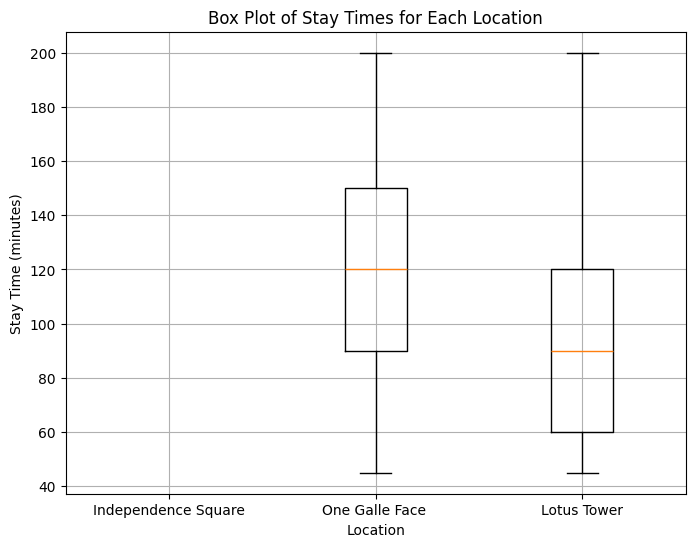

In [28]:
rawdata = pd.read_csv('preprocessing/organized_data.csv')

locations_of_interest = ['Independence Square', 'One Galle Face ', 'Lotus Tower']
filtered_data = rawdata[rawdata['locations'].isin(locations_of_interest)]
galle_face_green_data = rawdata[rawdata['locations'] == 'One Galle Face ']['stayTime']

stay_times = {}
for location in locations_of_interest:
    stay_times[location] = filtered_data[filtered_data['locations'] == location]['stayTime']

# Create a box plot to visualize the distribution of stay times for each location
plt.figure(figsize=(8, 6))
plt.boxplot(stay_times.values(), labels=stay_times.keys())
plt.title('Box Plot of Stay Times for Each Location')
plt.xlabel('Location')
plt.ylabel('Stay Time (minutes)')
plt.grid(True)
plt.show()

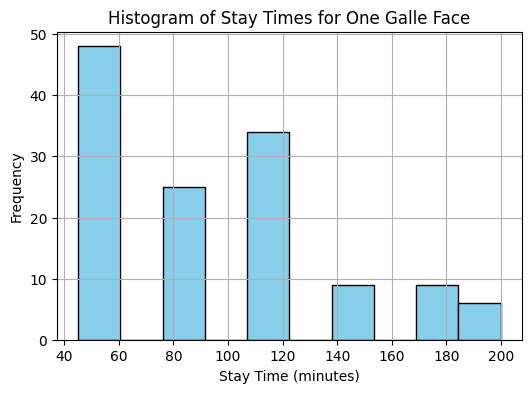

In [22]:
one_galle_face_data = rawdata[rawdata['locations'] == 'Lotus Tower']['stayTime']

# Create the histogram
plt.figure(figsize=(6, 4))
plt.hist(one_galle_face_data, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Stay Times for One Galle Face')
plt.xlabel('Stay Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

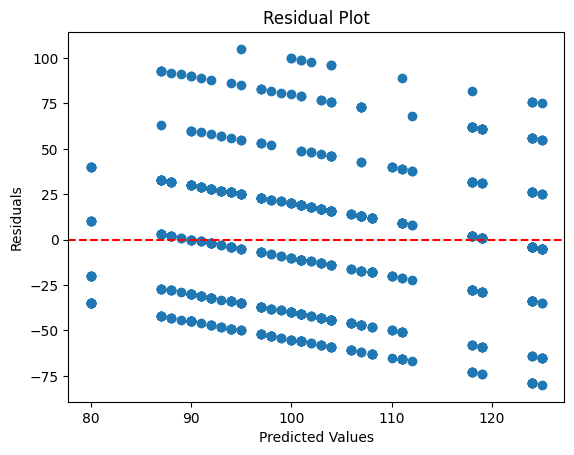

In [29]:
residuals = y_test - y_preds
plt.scatter(y_preds, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

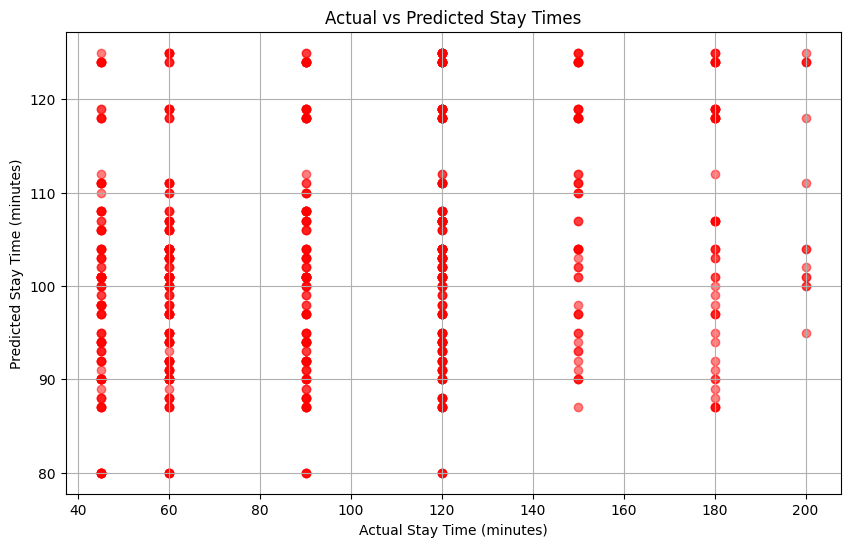

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
plt.title('Actual vs Predicted Stay Times')
plt.xlabel('Actual Stay Time (minutes)')
plt.ylabel('Predicted Stay Time (minutes)')
plt.grid(True)
plt.show()

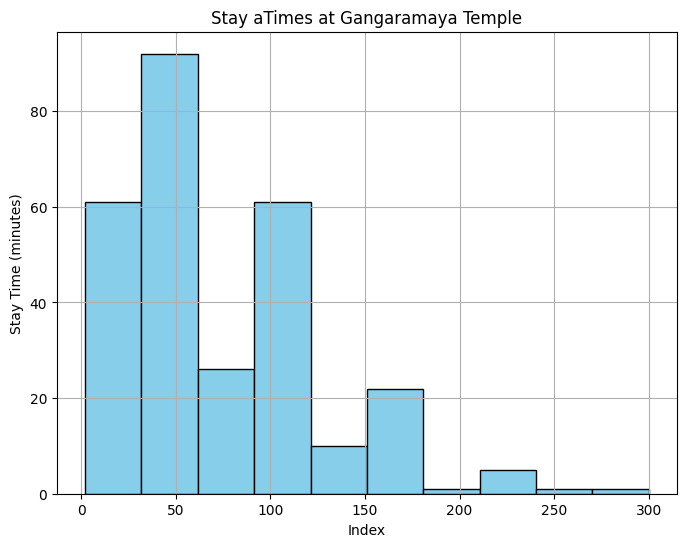

In [16]:
df2 = pd.read_csv('TripAdvisor_data_edited.csv')

plt.figure(figsize=(8, 6))
plt.hist(df2['Gangaramaya Temple'],  bins=10, color='skyblue', edgecolor='black')
plt.title('Stay aTimes at Gangaramaya Temple')
plt.xlabel('Index')
plt.ylabel('Stay Time (minutes)')
plt.grid(True)
plt.show()

In [17]:
import numpy as np

# Compute average stay time for each time of day
# average_stay_times = rawdata.groupby('locationType')['stayTime'].mean()
average_stay_time_one_galle_face = rawdata[rawdata['locationType'] == 'One Galle Face ']['stayTime'].mean()

plt.figure(figsize=(10, 6))

plt.scatter(average_stay_time_one_galle_face.index, average_stay_time_one_galle_face.values, color='red')
plt.title('Location type vs Predicted Stay Times')
plt.xlabel('Actual Stay Time (minutes)')
plt.ylabel('Predicted Stay Time (minutes)')
plt.grid(True)
plt.show()

NameError: name 'rawdata' is not defined